# Study My spectra

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : April 1st 2021
- version 

# Imports

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [44]:
import imp
MODULE_EXTENSIONS = ('.py', '.pyc', '.pyo')

In [45]:
def package_contents(package_name):
    file, pathname, description = imp.find_module(package_name)
    if file:
        raise ImportError('Not a package: %r', package_name)
    # Use a set because some may be both source and compiled.
    return set([os.path.splitext(module)[0]
        for module in os.listdir(pathname)
        if module.endswith(MODULE_EXTENSIONS)])

In [46]:
package_contents("spectractor")

{'__init__',
 '_version',
 'astrometry',
 'config',
 'logbook',
 'parameters',
 'tools'}

In [47]:
package_contents("spectractor/extractor")

{'__init__',
 'background',
 'chromaticpsf',
 'dispersers',
 'extractor',
 'images',
 'psf',
 'spectroscopy',
 'spectrum',
 'targets'}

# Import

In [48]:
from spectractor.extractor.spectrum import Spectrum
from spectractor.config import load_config

# Configuration

In [49]:
config = "config/auxtel_quicklook.ini"
load_config(config)

# Logbook

In [50]:
filename_logbook='logbooks/auxtellogbook_2021_v1.1.csv'
#filename_logbook='logbooks/ctiofulllogbook_jun2017_v5.csv'

In [51]:
df=pd.read_csv(filename_logbook)

In [52]:
pd.set_option('display.max_rows', None)

In [53]:
df

,Unnamed: 0,index,date,path,file,num,object,filter,disperser,airmass,...,temperature,humidity,windspd,Obj-posXpix,Obj-posYpix,Dx,Dy,skip,run,quality
0,0,0,2021-02-17T01:45:09.091,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_RG610_HD50896_2021-02-16_181.fits,181,HD50896,RG610,holo4_003,1.006209,...,10.3,51.0,9.3,NaN,NaN,NaN,NaN,,NaN,NaN
1,1,1,2021-02-17T03:37:12.647,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_empty_HD50896_2021-02-16_209.fits,209,HD50896,empty_1,holo4_003,1.099905,...,10.4,45.0,9.9,NaN,NaN,NaN,NaN,,NaN,NaN
2,2,2,2021-02-18T07:25:02.387,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_350.fits,350,NGC4755,empty_1,holo4_003,1.158253,...,8.8,53.0,7.3,NaN,NaN,NaN,NaN,,NaN,NaN
3,3,3,2021-02-18T07:25:46.560,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_351.fits,351,NGC4755,empty_1,holo4_003,1.158097,...,8.8,54.0,6.3,NaN,NaN,NaN,NaN,,NaN,NaN
4,4,4,2021-02-18T07:26:07.146,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_352.fits,352,NGC4755,empty_1,holo4_003,1.158027,...,8.8,54.0,6.3,NaN,NaN,NaN,NaN,,NaN,NaN
5,5,5,2021-02-18T07:26:18.957,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_353.fits,353,NGC4755,empty_1,holo4_003,1.157987,...,8.8,55.0,7.7,NaN,NaN,NaN,NaN,,NaN,NaN
6,6,6,2021-02-18T07:26:43.049,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_354.fits,354,NGC4755,empty_1,holo4_003,1.157907,...,8.8,55.0,7.7,NaN,NaN,NaN,NaN,,NaN,NaN
7,7,7,2021-02-18T07:26:51.615,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_355.fits,355,NGC4755,empty_1,holo4_003,1.157879,...,8.8,55.0,7.7,NaN,NaN,NaN,NaN,,NaN,NaN
8,8,8,2021-02-18T07:27:00.190,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_356.fits,356,NGC4755,empty_1,holo4_003,1.157851,...,8.8,55.0,7.7,NaN,NaN,NaN,NaN,,NaN,NaN
9,9,9,2021-02-18T07:27:53.863,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_357.fits,357,NGC4755,empty_1,holo4_003,1.157723,...,8.7,55.0,6.7,NaN,NaN,NaN,NaN,,NaN,NaN


# Select good spectra

In [54]:
df_good=df[df["quality"]==1]

In [55]:
for spectra_file in df_good["file"]:
    print(spectra_file)
    

Cor_holo4_003_RG610_HD75519_2021-03-11_292.fits
Cor_holo4_003_RG610_HD75519_2021-03-11_293.fits
Cor_holo4_003_RG610_HD75519_2021-03-11_294.fits
Cor_holo4_003_RG610_HD75519_2021-03-11_295.fits
Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits


# View good Reconstructed spectra

In [56]:
dir_spectra="outputs"

In [57]:
all_files=os.listdir(dir_spectra)

In [58]:
all_spectra_files = []
for filename in all_files:
    if re.search("_spectrum.fits$",filename):
        all_spectra_files.append(filename)
N=len(all_spectra_files)

In [59]:
all_good_spectra_spectrum_files=[]

for good_spectra_file in df_good["file"]:
    good_spectra_spectrum_file = good_spectra_file.split(".")[0]+"_spectrum.fits"
    if good_spectra_spectrum_file in all_spectra_files:
        print("found {}".format(good_spectra_spectrum_file))
        all_good_spectra_spectrum_files.append(good_spectra_spectrum_file)
    

found Cor_holo4_003_RG610_HD75519_2021-03-11_292_spectrum.fits
found Cor_holo4_003_RG610_HD75519_2021-03-11_293_spectrum.fits
found Cor_holo4_003_RG610_HD75519_2021-03-11_294_spectrum.fits
found Cor_holo4_003_RG610_HD75519_2021-03-11_295_spectrum.fits
found Cor_holo4_003_RG610_HD75519_2021-03-11_296_spectrum.fits


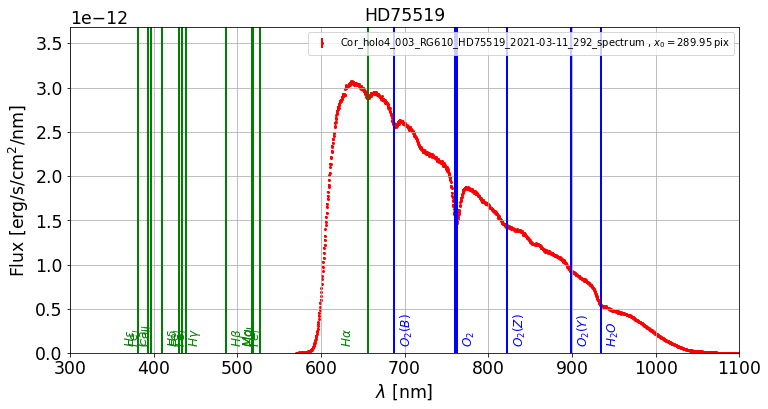

outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_292_spectrogram.fits


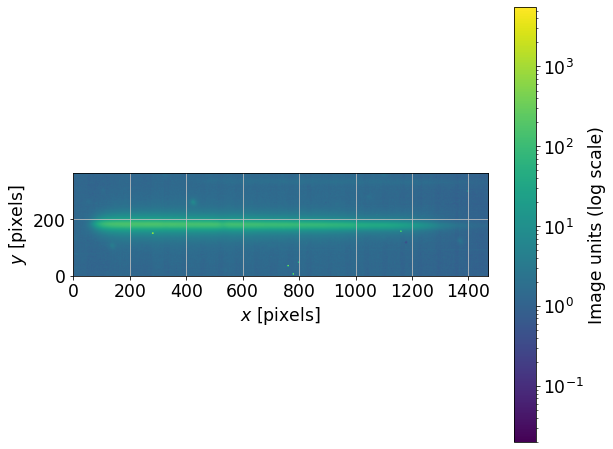

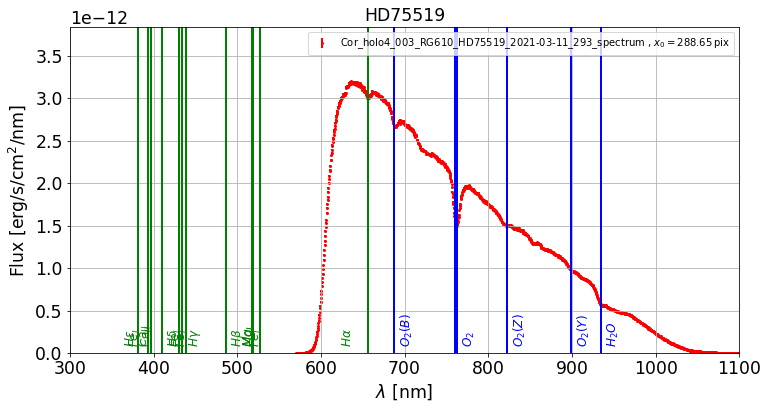

outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_293_spectrogram.fits


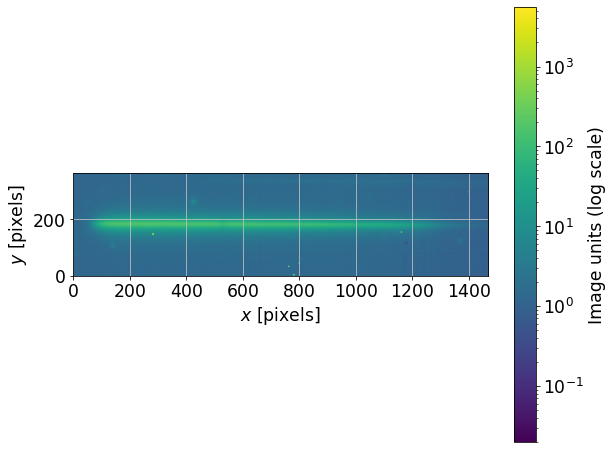

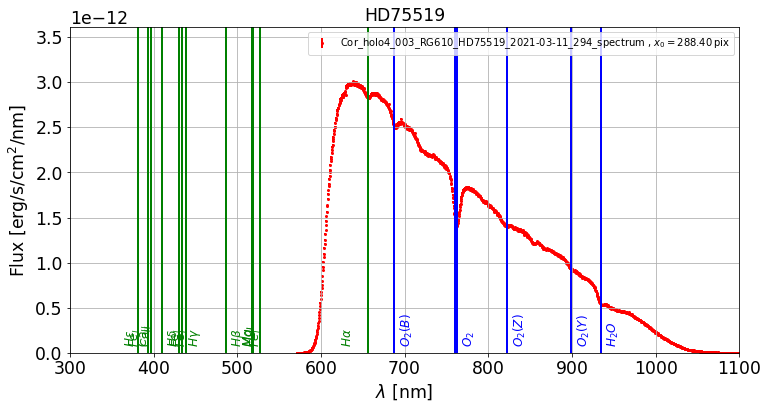

outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_294_spectrogram.fits


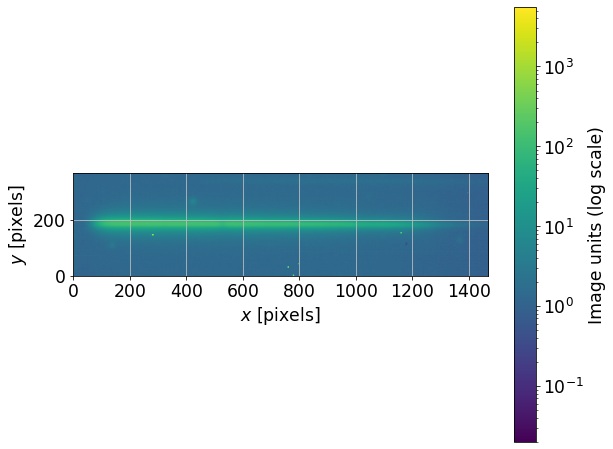

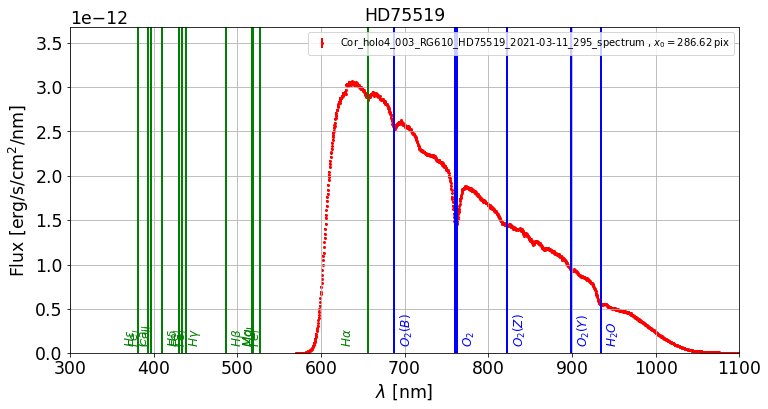

outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_295_spectrogram.fits


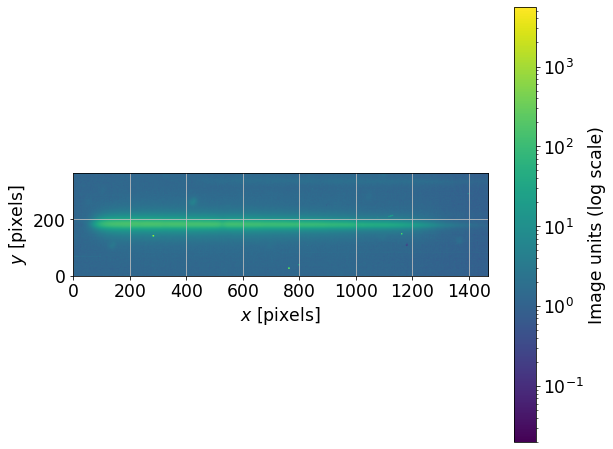

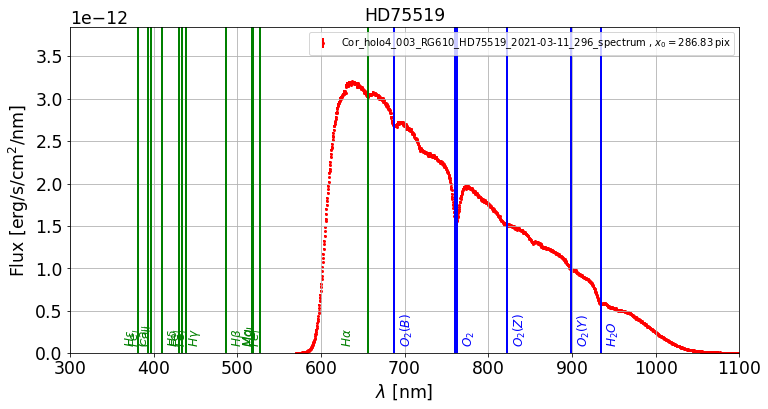

outputs/Cor_holo4_003_RG610_HD75519_2021-03-11_296_spectrogram.fits


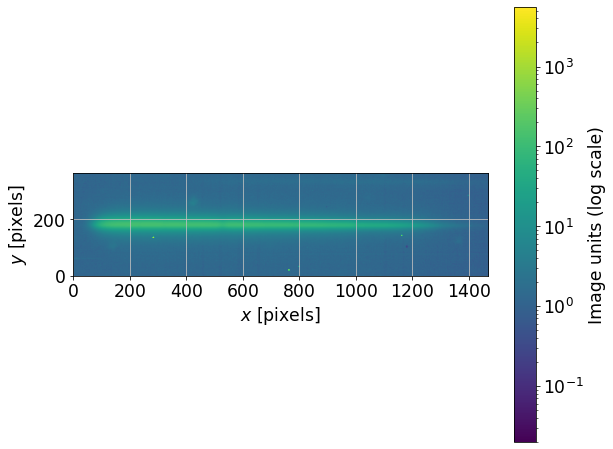

In [60]:
for filename in all_good_spectra_spectrum_files:
    #fig,ax=plt.subplots(111)
    fullfilename = os.path.join(dir_spectra,filename)
    
    s=Spectrum(fullfilename, config="config/auxtel_quicklook.ini")
    label=filename.split('.')[0]+" "
    s.plot_spectrum(force_lines=True,label=label)
    #plt.show()
    fullfilename2=fullfilename.replace("_spectrum","_spectrogram")
    print(fullfilename2)
    s.load_spectrogram(fullfilename2)
    s.plot_spectrogram(scale="log")
    